In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


In [ ]:
df = pd.read_csv('heart.csv')
df1 = pd.read_csv('o2Saturation.csv')

In [ ]:
print(df.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [ ]:
print(df1.head())

   98.6
0  98.6
1  98.6
2  98.6
3  98.1
4  97.5


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [ ]:
df1.isnull().sum()

,0
98.6,0


In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trtbps,int64
chol,int64
fbs,int64
restecg,int64
thalachh,int64
exng,int64
oldpeak,float64


In [ ]:
df1.dtypes

,0
98.6,float64


In [ ]:
df.shape

(303, 14)

In [ ]:
df1.shape

(3585, 1)

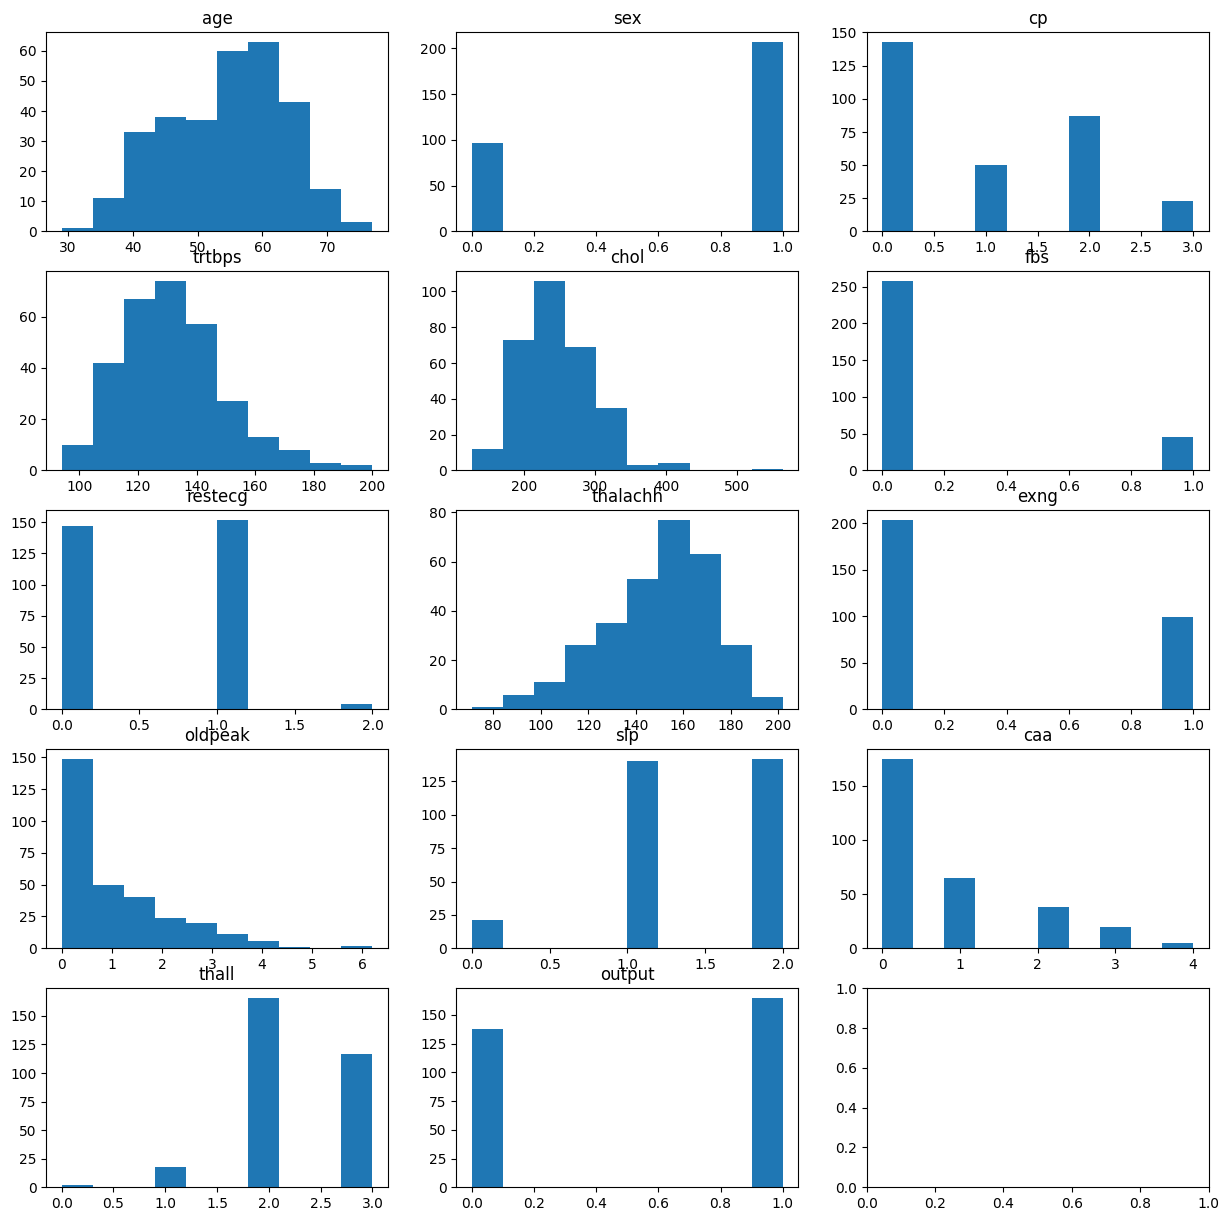

In [ ]:
import matplotlib.pyplot as plt

# Create a grid of subplots
fig, axs = plt.subplots(5, 3, figsize=(15, 15))

# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()

# Plot histograms for each feature in the dataframe
for i, feature in enumerate(df.columns):
    if i < len(axs):
        axs[i].hist(df[feature])
        axs[i].set_title(feature)

In [ ]:
df = df.dropna()

In [ ]:
df1 = df1.dropna()

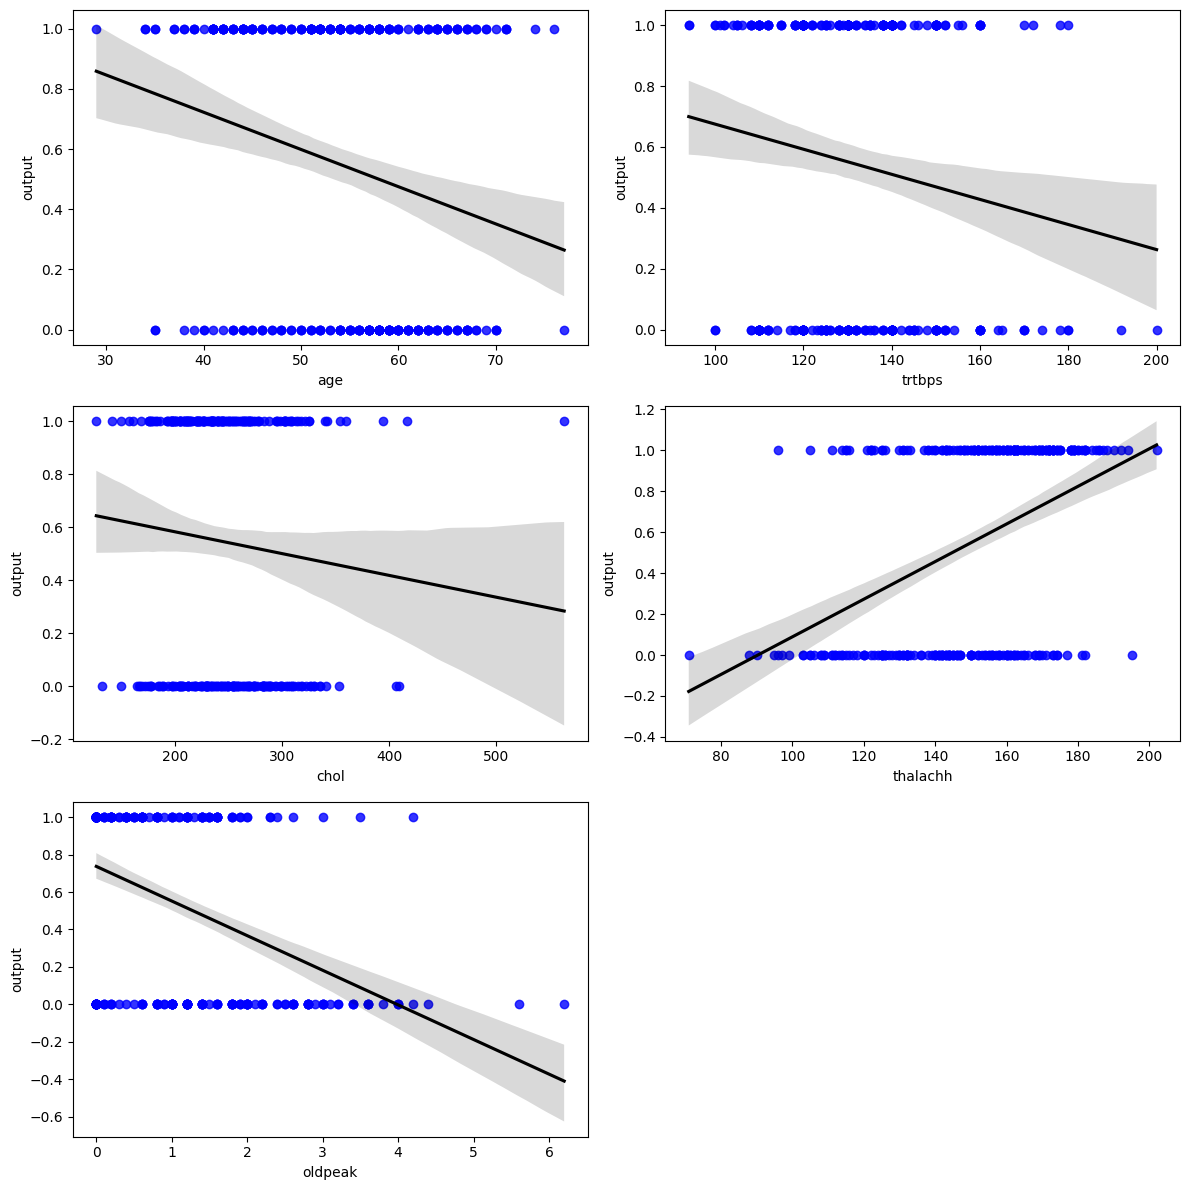

In [ ]:
# Bivariate Analysis
# Continuous numerical variable
bi_num = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
# Categorical Analysis
bi_cat = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Create a grid of subplots
fig, axs1 = plt.subplots(3, 2, figsize=(12, 12))
axs = axs1.ravel()

# Plot the regression for each feature
for i, col in enumerate(bi_num):
    sns.regplot(x=col, y='output', data=df, ax=axs[i], color='black', scatter_kws={"color":"blue"})

# Remove the last unused subplot
fig.delaxes(axs[-1])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

<ipython-input-25-c0a6fc8a2e7e>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='output', data=df, ax=axs[i], ci=None)
<ipython-input-25-c0a6fc8a2e7e>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='output', data=df, ax=axs[i], ci=None)
<ipython-input-25-c0a6fc8a2e7e>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='output', data=df, ax=axs[i], ci=None)
<ipython-input-25-c0a6fc8a2e7e>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='output', data=df, ax=axs[i], ci=None)
<ipython-input-25-c0a6fc8a2e7e>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='output', data=df, ax=axs[i], ci=None)
<ipython-input-25-c0a6fc8a2e7e>:10: FutureWar

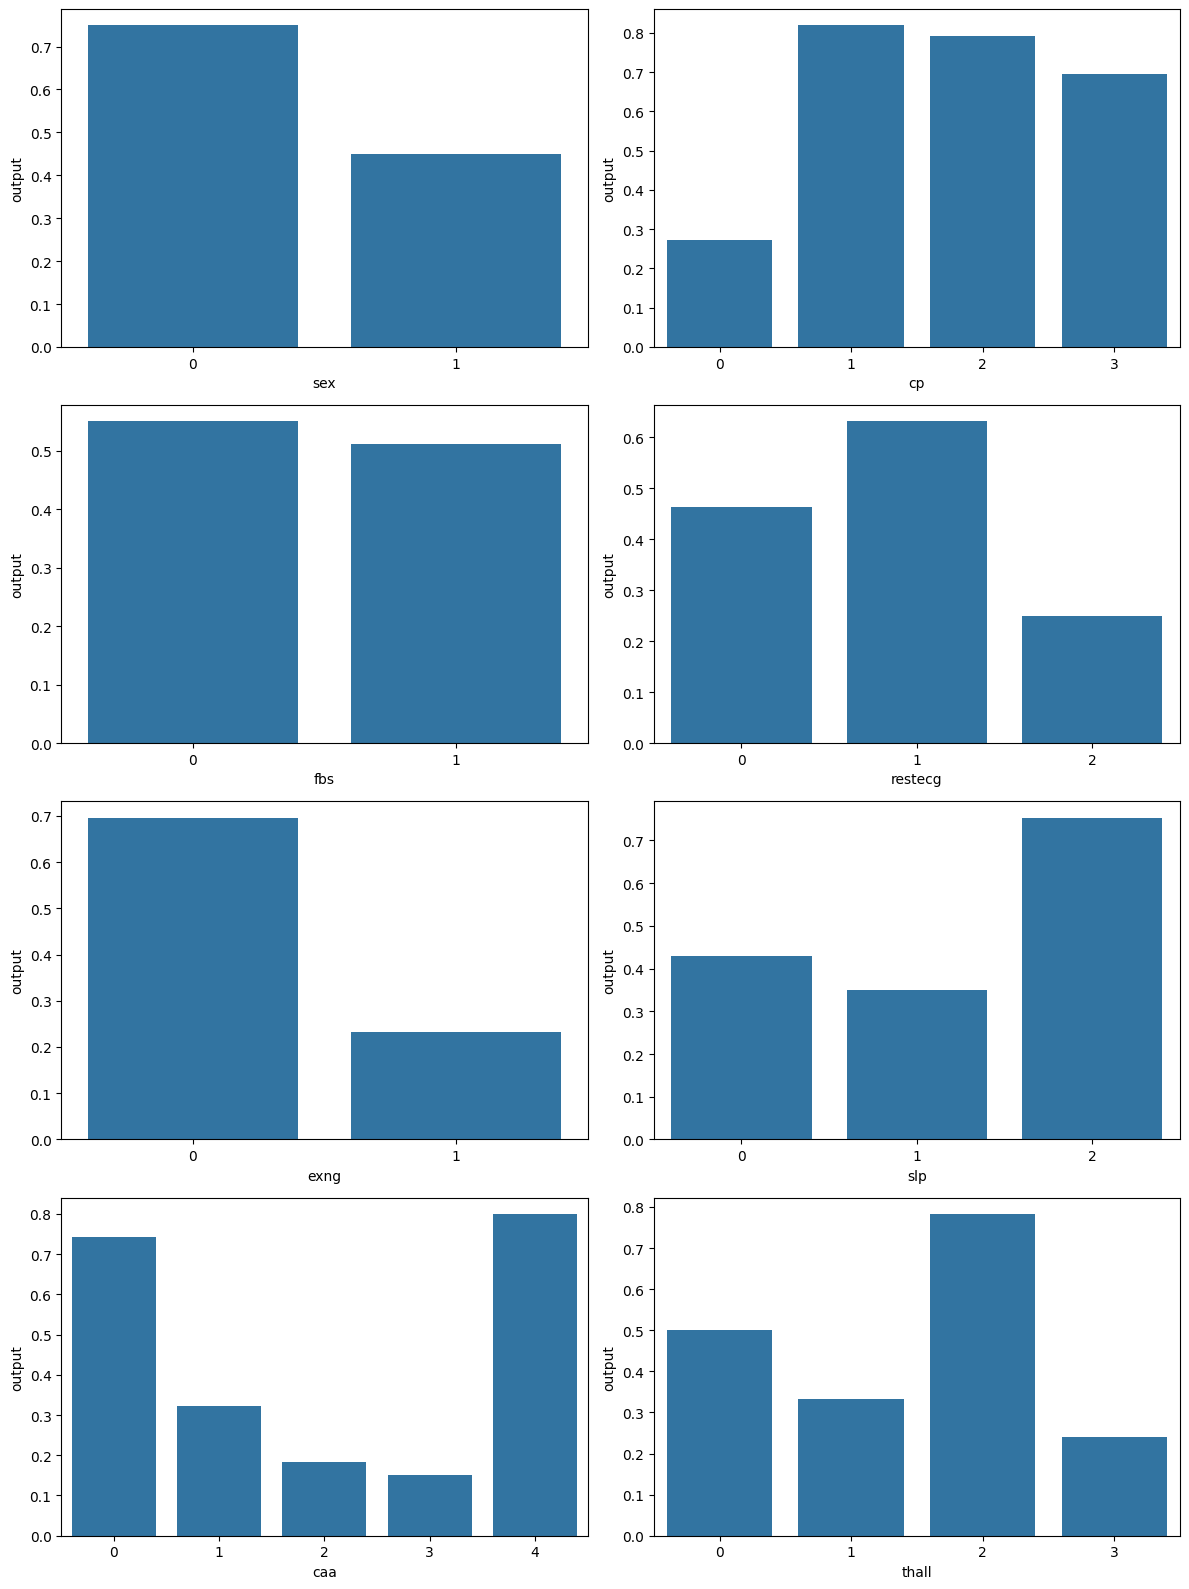

In [ ]:
cat = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Create a grid of subplots
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs = axs.ravel()

# Loop through each column in cat and plot
for i, col in enumerate(cat):
    if i < len(axs):
        sns.barplot(x=col, y='output', data=df, ax=axs[i], ci=None)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
X= df.drop('output',axis=1)
y= df.output

In [ ]:
#using mutual_info_classif for classification problem MI
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

,MI Scores
thall,0.142486
caa,0.121585
cp,0.108358
slp,0.104216
chol,0.093392
exng,0.091755
oldpeak,0.080814
thalachh,0.074462
restecg,0.058831
sex,0.028230


In [ ]:
from sklearn.model_selection import train_test_split

# dataset split function
def dataset(X, y):
    # First split: train + validation and test
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y, test_size=0.2, random_state=0)

    # Second split: train and test
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25, random_state=0)

    # Return train, validation, and test sets
    return (train_X, val_X, train_y, val_y, test_X, test_y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

def dataset(X, y):
    # Split the data into training + validation and test sets
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y, test_size=0.2, random_state=0)
    # Further split the training data into training and validation sets
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25, random_state=0)
    return train_X, val_X, train_y, val_y

def scale(X):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    return scaler.fit_transform(X)

# Initialize the model list
model = []

# Assign features and target variable
features = ['thall', 'caa', 'cp', 'oldpeak', 'exng', 'chol', 'thalachh']
X = df[features]
y = df.output

# Scale the features
X = scale(X)

# Split the dataset
X_train, X_val, y_train, y_val = dataset(X, y)

# Train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, y_train)

# Make predictions
preds = tree_model.predict(X_val)

# Compute metrics
a = 'Decision Tree with top 7'
acc = accuracy_score(y_val, preds) * 100
roc = roc_auc_score(y_val, tree_model.predict_proba(X_val)[:, 1])

# Print results
print('ACCURACY: ', acc)
print('AUC score: ', roc)

# Append results to the model list
model.append((a, round(acc, 4), round(roc, 4)))


ACCURACY:  70.49180327868852
AUC score:  0.7009803921568628


In [ ]:
#Now we are doing for all features
X= df.drop('output',axis=1)
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

tree_model= DecisionTreeClassifier(random_state=1)
tree_model.fit(X_train, y_train)
preds= tree_model.predict(X_val)

a='Decision Tree with all features'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  77.04918032786885
AUC score:  0.767429193899782


In [ ]:
#Random Forest Classifier with top 7 features
from sklearn.ensemble import RandomForestClassifier

X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

a='Random Forest with top 7'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  85.24590163934425
AUC score:  0.8523965141612201


In [ ]:
#Random Forest classifier with all features
X= df.drop('output',axis=1)
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

a='Random Forest with all features'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  81.9672131147541
AUC score:  0.8191721132897605


In [ ]:
X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

#determing depth
depth=[5,10,15,20]
score=[]
score1=[]
for d in depth:
       for n in range(10,201,10):


        rmodel = RandomForestClassifier(n_estimators=n,random_state=1,max_depth=d)
        rmodel.fit(X_train, y_train)

        pred = rmodel.predict(X_val)
        acc= accuracy_score(y_val,pred)*100
        auc = roc_auc_score(y_val,pred)

        #print('%4s %s  %.2f %.3f'%(n,d,acc,auc))
        score.append((d,n,auc))

#creating dataframe
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(score, columns=columns)

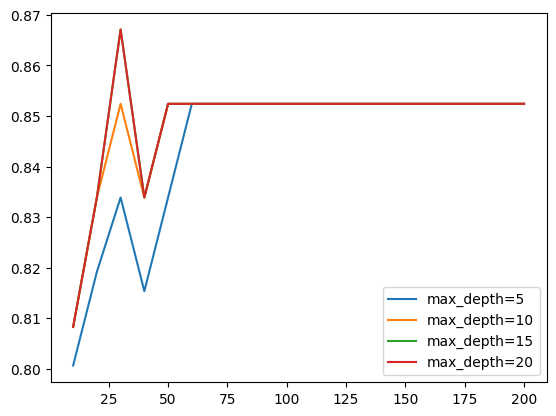

In [ ]:
import matplotlib.pyplot as plt
for d in depth:
    subset = df_scores[df_scores.max_depth == d]

    plt.plot(subset.n_estimators, subset.auc,label='max_depth=%d' % d)

plt.legend()

In [ ]:
depth= 20
#getting samples
score1=[]

samples=[1,5,10,25,30,50]
for s in samples:
       for n in range(10,201,10):


        rmodel = RandomForestClassifier(n_estimators=n,random_state=1,max_depth=depth,min_samples_leaf=s)
        rmodel.fit(X_train, y_train)

        pred = rmodel.predict(X_val)
        acc= accuracy_score(y_val,pred)*100
        auc = roc_auc_score(y_val,pred)

        #print('%4s %s  %.2f %.3f'%(n,d,acc,auc))
        #score.append((d,n,acc))
        score1.append((s,n,auc))


columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(score1, columns=columns)

In [ ]:
## finalized paramter values

X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(n_estimators=27,random_state=11,max_depth=20,min_samples_leaf=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

a='Random Forest with parameter tuning'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  86.88524590163934
AUC score:  0.8709150326797386


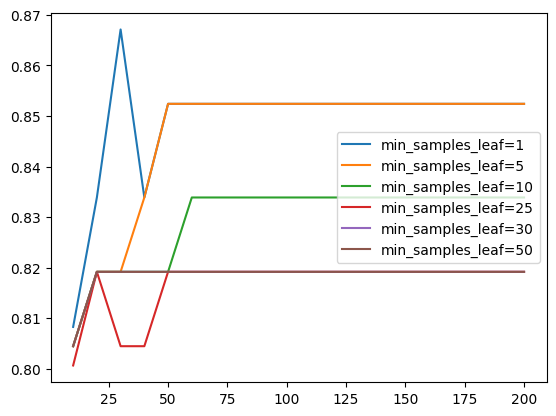

In [ ]:
for s in samples:
    subset = df_scores[df_scores.min_samples_leaf == s]

    plt.plot(subset.n_estimators, subset.auc,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [ ]:
from xgboost import XGBClassifier

X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
a='XCB with with top 7 features'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  86.88524590163934
AUC score:  0.8709150326797386


In [ ]:
X= df.drop('output',axis=1)
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
a='XGB with all features'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  86.88524590163934
AUC score:  0.8709150326797386


In [ ]:
X= df[features]
y= df.output

X= scale(X)
X_train,X_val,y_train,y_val= dataset(X,y)

xgb_model = XGBClassifier(learning_rate=0.05,n_estimators=190,max_depth=4)
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
a='XGB with parameter tuning'
acc=accuracy_score(y_val,preds)*100
roc=roc_auc_score(y_val,preds)

print('ACCURACY: ',acc)
print('AUC score: ',roc)

model.append((a,round(acc,4),round(roc,4)))

ACCURACY:  86.88524590163934
AUC score:  0.8709150326797386
